## IK SL assignment2

In [118]:
from mnist import MNIST
from matplotlib import pyplot
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.pipeline import make_pipeline

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn import tree

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.metrics import roc_auc_score

In [9]:
from sklearn.svm import SVC

In [10]:
from sklearn.neighbors import NearestNeighbors

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

In [13]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [14]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

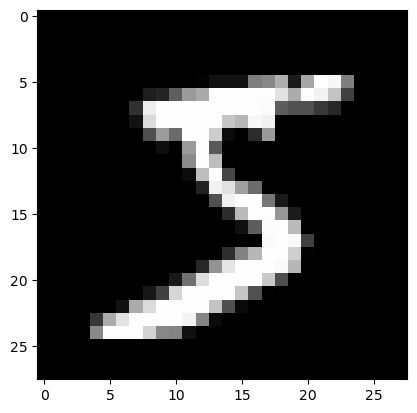

In [15]:
pixels = X[0].reshape((28, 28))
plt.imshow(pixels, cmap='gray')

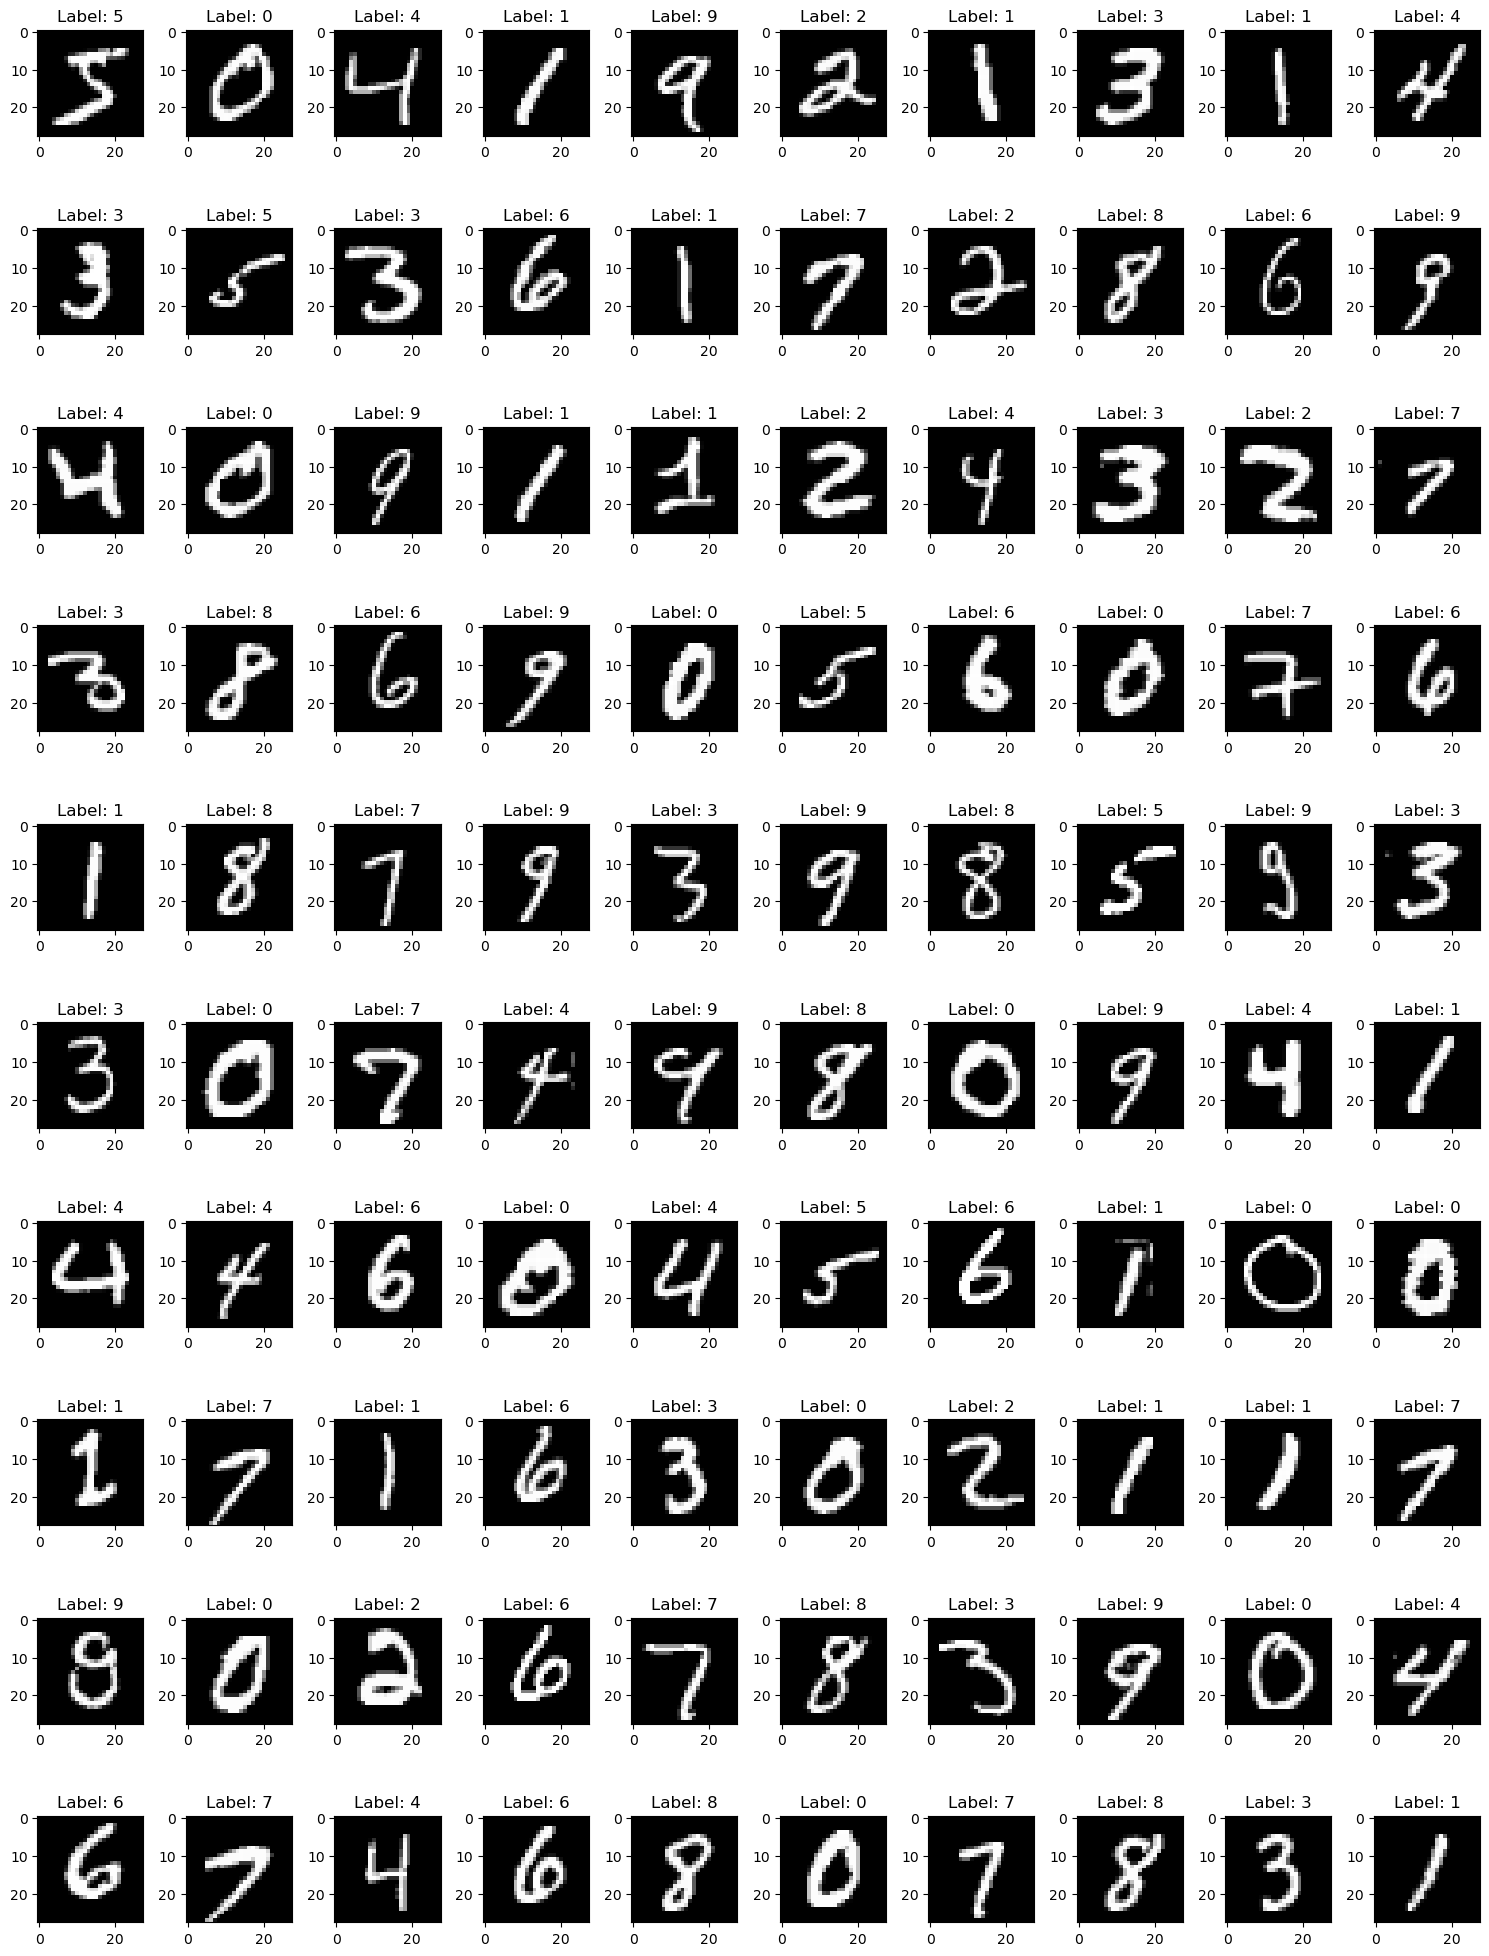

In [16]:
num_row = 10
num_col = 10

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(100):
    ax = axes[i//num_col, i%num_col]
    pixels = X[i].reshape((28, 28))
    ax.imshow(pixels, cmap='gray')
    ax.set_title('Label: {}'.format(y[i]))
plt.tight_layout()
plt.show()

In [17]:
y_5 = (y =='5')*1

In [18]:
y_5

array([1, 0, 0, ..., 0, 1, 0])

In [19]:
sum(y_5)

6313

In [20]:
X_train, X_test, y5_train, y5_test = train_test_split(
    X, y_5, test_size=10000, random_state=42)

* cross-validation
* confusion matrix
* precision
* recall
* f1-score
* roc curve

* SVM
* Decision Trees
* Random Forest
* KNN ...

# single class

### Decision Tree

In [25]:
clf = tree.DecisionTreeClassifier()

In [26]:
param_grid = [{'min_samples_split':[20,30], 'min_samples_leaf':[5,10], 'max_depth':[5,10]}]

In [27]:
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=5, refit=True, n_jobs=-1)

In [28]:
gs = gs.fit(X_train, y5_train)

In [29]:
clf = gs.best_estimator_

In [30]:
# y5_train_pred = clf.predict_proba(X_train)[:, 1]
y5_train_pred = clf.predict(X_train)

In [31]:
np.sum(y5_train_pred)

5051

In [32]:
def print_scores(y, yhat, label):
    print(f"{label} precision_score: {precision_score(y, yhat)} \n")
    print(f"{label} recall_score: {recall_score(y, yhat)} \n")
    print(f"{label} f1_score: {f1_score(y, yhat)} \n")
    print(f"{label} roc_auc_score: {roc_auc_score(y, yhat)} \n")

In [33]:
print_scores(y5_train, y5_train_pred, 'training class 5: decision tree')

training class 5: decision tree precision_score: 0.9188279548604237 

training class 5: decision tree recall_score: 0.86328125 

training class 5: decision tree f1_score: 0.8901889325788818 

training class 5: decision tree roc_auc_score: 0.9278876958845929 



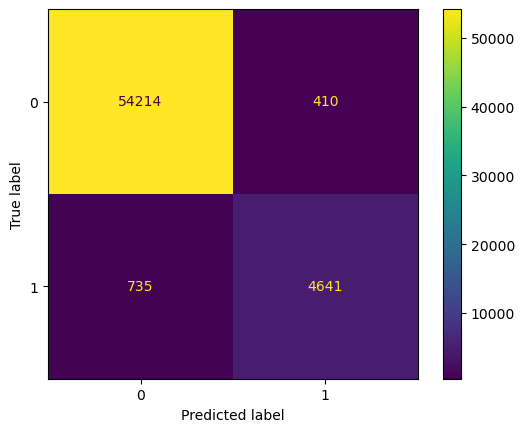

In [34]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_train, y5_train)

In [35]:
y5_test_pred = clf.predict(X_test)

In [36]:
print_scores(y5_test, y5_test_pred, 'testing class 5: decision tree')

testing class 5: decision tree precision_score: 0.8903002309468823 

testing class 5: decision tree recall_score: 0.8228388473852721 

testing class 5: decision tree f1_score: 0.8552412645590682 

testing class 5: decision tree roc_auc_score: 0.9061783335458856 



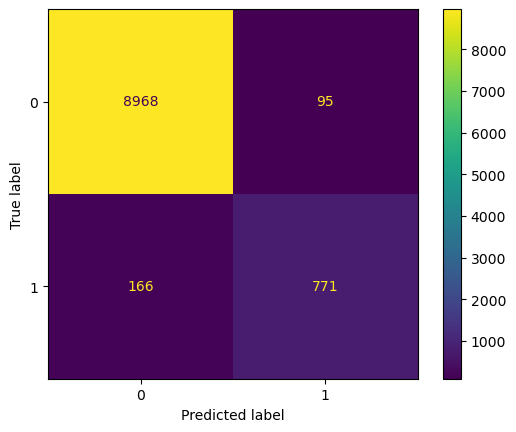

In [37]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y5_test)

### Random Forest

In [39]:
clf = RandomForestClassifier()

In [40]:
param_grid = [{'min_samples_split':[20,30], 'min_samples_leaf':[5,10], 'max_depth':[5,10]}]

In [41]:
param_grid = [{'min_samples_split':[20,30], 'min_samples_leaf':[5,10], 'max_depth':[5,10]}]

In [42]:
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=5, refit=True, n_jobs=-1)

In [43]:
gs = gs.fit(X_train, y5_train)

In [44]:
clf = gs.best_estimator_

In [45]:
# y5_train_pred = clf.predict_proba(X_train)[:, 1]
y5_train_pred = clf.predict(X_train)

In [46]:
np.sum(y5_train_pred)

4408

In [47]:
def print_scores(y, yhat, label):
    print(f"{label} precision_score: {precision_score(y, yhat)} \n")
    print(f"{label} recall_score: {recall_score(y, yhat)} \n")
    print(f"{label} f1_score: {f1_score(y, yhat)} \n")
    print(f"{label} roc_auc_score: {roc_auc_score(y, yhat)} \n")

In [48]:
print_scores(y5_train, y5_train_pred, 'training class 5: Random Forest')

training class 5: Random Forest precision_score: 0.9952359346642469 

training class 5: Random Forest recall_score: 0.8160342261904762 

training class 5: Random Forest f1_score: 0.8967702371218316 

training class 5: Random Forest roc_auc_score: 0.9078248898966441 



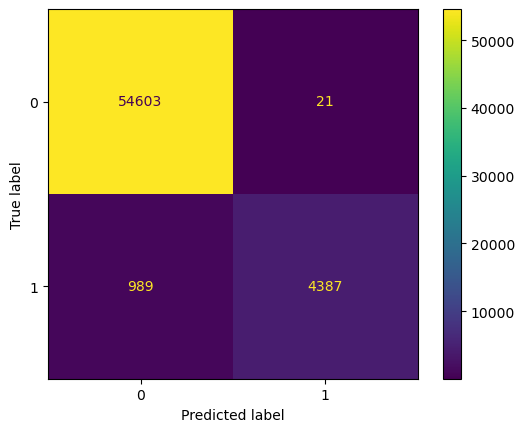

In [49]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_train, y5_train)

In [50]:
y5_test_pred = clf.predict(X_test)

In [51]:
print_scores(y5_test, y5_test_pred, 'testing class 5: Random Forest')

testing class 5: Random Forest precision_score: 0.9945280437756497 

testing class 5: Random Forest recall_score: 0.775880469583778 

testing class 5: Random Forest f1_score: 0.8717026378896883 

testing class 5: Random Forest roc_auc_score: 0.8877195573120258 



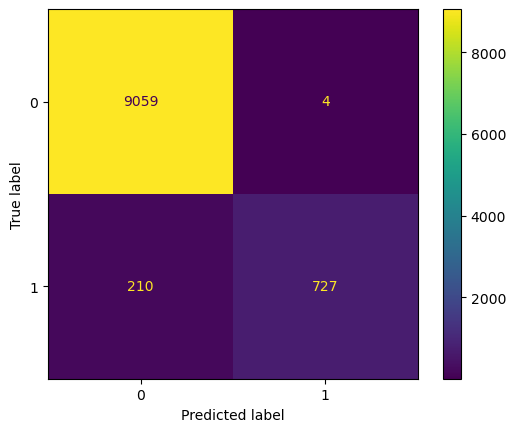

In [52]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y5_test)

In [53]:
# X2 = StandardScaler().fit_transform(X)

In [54]:
# X2_train, X2_test, y5_train, y5_test = train_test_split(
#     # X2, y_5, test_size=10000, random_state=42)

### SVM

In [85]:
clf = SVC()

In [87]:
param_grid = [{'kernel':['rbf'], 'C':[1,0.5,2], 'gamma':[0.0001, 0.01, 1, 10, 100]}]

In [108]:
# gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=3, refit=True, n_jobs=-1)

In [110]:
# gs = gs.fit(X_train, y5_train)

In [ ]:
clf = gs.best_estimator_

In [ ]:
# y5_train_pred = clf.predict_proba(X_train)[:, 1]
y5_train_pred = clf.predict(X_train)

In [ ]:
np.sum(y5_train_pred)

In [ ]:
def print_scores(y, yhat, label):
    print(f"{label} precision_score: {precision_score(y, yhat)} \n")
    print(f"{label} recall_score: {recall_score(y, yhat)} \n")
    print(f"{label} f1_score: {f1_score(y, yhat)} \n")
    print(f"{label} roc_auc_score: {roc_auc_score(y, yhat)} \n")

In [ ]:
print_scores(y5_train, y5_train_pred, 'training class 5: SVM')

In [ ]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_train, y5_train)

In [ ]:
y5_test_pred = clf.predict(X_test)

In [ ]:
print_scores(y5_test, y5_test_pred, 'testing class 5: SVM')

In [ ]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y5_test)

### KNN

In [120]:
clf = KNeighborsClassifier()

In [132]:
param_grid = [{'n_neighbors':[5,7,10], 'metric':['cosine']}]

In [134]:
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=3, refit=True, n_jobs=-1)

In [136]:
gs = gs.fit(X_train, y5_train)

In [137]:
clf = gs.best_estimator_

In [138]:
# y5_train_pred = clf.predict_proba(X_train)[:, 1]
y5_train_pred = clf.predict(X_train)

In [139]:
np.sum(y5_train_pred)

5246

In [140]:
def print_scores(y, yhat, label):
    print(f"{label} precision_score: {precision_score(y, yhat)} \n")
    print(f"{label} recall_score: {recall_score(y, yhat)} \n")
    print(f"{label} f1_score: {f1_score(y, yhat)} \n")
    print(f"{label} roc_auc_score: {roc_auc_score(y, yhat)} \n")

In [141]:
print_scores(y5_train, y5_train_pred, 'training class 5: KNN')

training class 5: KNN precision_score: 0.9923751429660694 

training class 5: KNN recall_score: 0.9683779761904762 

training class 5: KNN f1_score: 0.9802297119186594 

training class 5: KNN roc_auc_score: 0.9838228486693449 



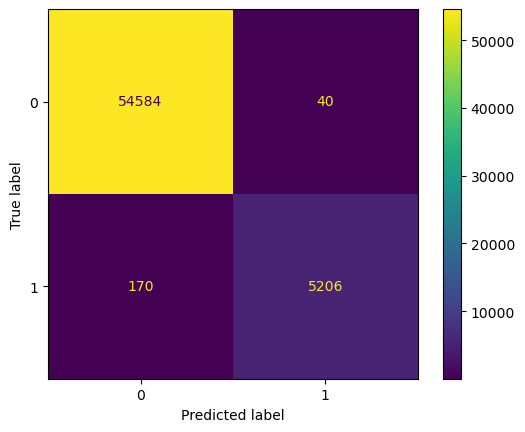

In [142]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_train, y5_train)

In [143]:
y5_test_pred = clf.predict(X_test)

In [144]:
print_scores(y5_test, y5_test_pred, 'testing class 5: KNN')

testing class 5: KNN precision_score: 0.9933701657458563 

testing class 5: KNN recall_score: 0.959445037353255 

testing class 5: KNN f1_score: 0.9761129207383278 

testing class 5: KNN roc_auc_score: 0.9793915024568328 



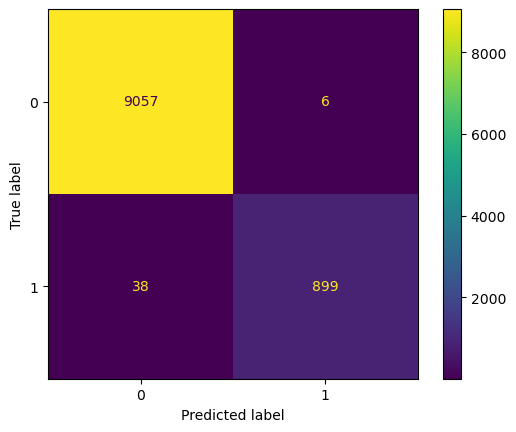

In [145]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y5_test)